# IMPORT

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import train_test_split

## Intoduction

> Write 5 examples of the application of ML methods in life. What is the benefit of using machine learning methods in each of your examples?

- Health diagnosis
    - Computers might be able to notice something docters are not improving the simplicity for diagnosis
- Fraud detection
    - Banks are able to catch more fraud as there are too many accounts for people to watch. The machine can idenify suspicous accounts for further investigation
- Personlized Recommendations
    -  Online stores can show on the front page what a person is most likley looking for based on previous experience
- Large Language models
    - Help people answer questions and provide a simpler way to access information
- Predictive maintenance
    - Delivery for part could take a long time and if not done at the right time more expensive and difficult


## Introduction to Data Analysis

In [703]:
df = pd.read_json('data/train.json')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


Target column is Price as we want to predict the price of apartments

In [704]:
df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [705]:
int_df = df.select_dtypes(include=['int64', 'float64'])
int_df.corr()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
bathrooms,1.000000,0.533446,-0.009657,0.000776,0.010393,0.069661
bedrooms,0.533446,1.000000,-0.004745,0.011968,0.006892,0.051788
latitude,-0.009657,-0.004745,1.000000,0.001712,-0.966807,-0.000707
listing_id,0.000776,0.011968,0.001712,1.000000,-0.000907,0.008090
longitude,0.010393,0.006892,-0.966807,-0.000907,1.000000,-0.000087
price,0.069661,0.051788,-0.000707,0.008090,-0.000087,1.000000


There are no empty columns, correlations are goof. bedroom and bathroom being high makes sense as the more rooms the more bathrooms there would be

In [706]:
df = df[['bathrooms', 'bedrooms', 'price', 'interest_level']]
df = df.reset_index(drop=True)
df.head()

,bathrooms,bedrooms,price,interest_level
0,1.0,1,2400,medium
1,1.0,2,3800,low
2,1.0,2,3495,medium
3,1.5,3,3000,medium
4,1.0,0,2795,low


## Statistical Data Analysis

### Target analysis

> Plot a histogram to understand the distribution of the target. Is it all clear?

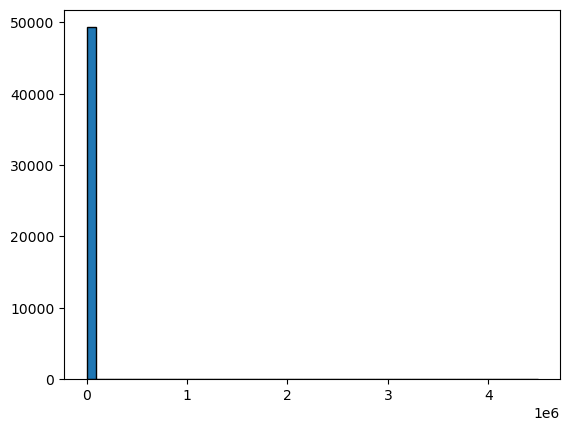

In [707]:
plt.hist(df['price'], edgecolor='black', bins=50)
plt.show()

It is not clear due to the large outliers

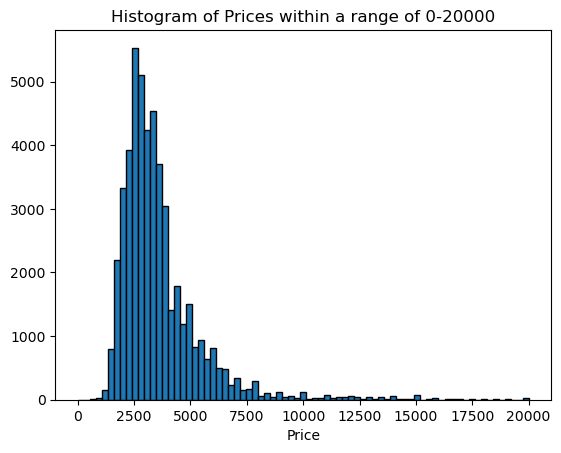

In [708]:
plt.hist(df['price'],range=[0,20000], edgecolor='black', bins=75)
plt.title('Histogram of Prices within a range of 0-20000')
plt.xlabel('Price')
plt.show()

> The next step is boxplot(). What can you say about the target? Are there any outliers?

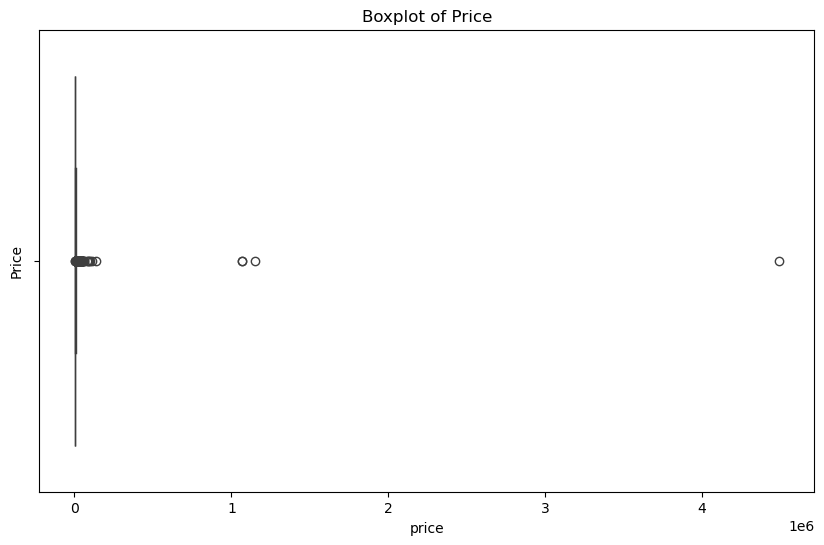

In [709]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price')
plt.ylabel('Price')
plt.show()

There are strong outliers that make the data unreadable

> Drop the rows that are outside the 1 and 99 percentiles from the target column.

In [710]:
upper_perc = np.percentile(df['price'], 99)
lower_perc = np.percentile(df['price'], 1)

In [711]:
df = df[(df['price'] < upper_perc) & (df['price'] > lower_perc)]
df = df.reset_index(drop=True)
df

,bathrooms,bedrooms,price,interest_level
0,1.0,1,2400,medium
1,1.0,2,3800,low
2,1.0,2,3495,medium
3,1.5,3,3000,medium
4,1.0,0,2795,low
...,...,...,...,...
48338,1.0,3,2800,low
48339,1.0,2,2395,medium
48340,1.0,1,1850,medium
48341,1.0,2,4195,medium


> Plot another histogram for price. Explain the result.

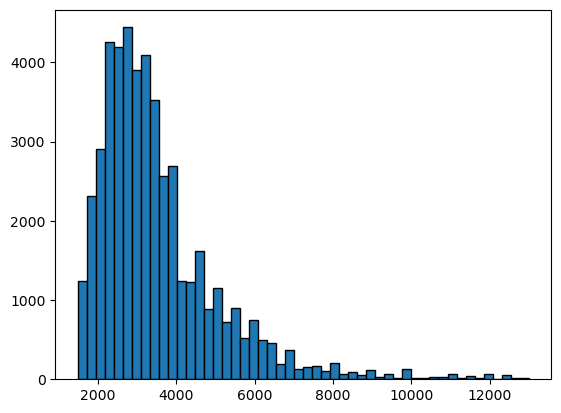

In [712]:
plt.hist(df['price'], edgecolor='black', bins=50)
plt.show()

The extreme outliers have been removed but there are still alot of outliers in the data this can be sean by the dots past the thin line. While the median price is around 3000 the max price goes over 12000. Causing a strong dispercity in the data

### Characteristics Analysis

> What is the type of column 'interest_level'?

In [713]:
print(df['interest_level'].dtype)

object


> Print the values in this column. How many entries does each value contain?

In [714]:
print(df['interest_level'].value_counts())

interest_level
low       33672
medium    11114
high       3557
Name: count, dtype: int64


> Decode these values. For example, you can replace each value with 0, 1, or 2.

In [715]:
df['interest_level'] = df['interest_level'].map({'low': 0, 'medium': 1, 'high': 2})
df['interest_level'].value_counts()

interest_level
0    33672
1    11114
2     3557
Name: count, dtype: int64

> Plot histograms for the features 'bathrooms', 'bedrooms'. Are there any outliers?

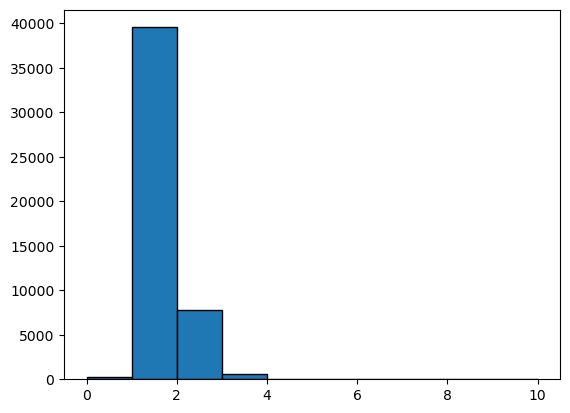

In [716]:
plt.hist(df['bathrooms'], edgecolor='black')

plt.show()

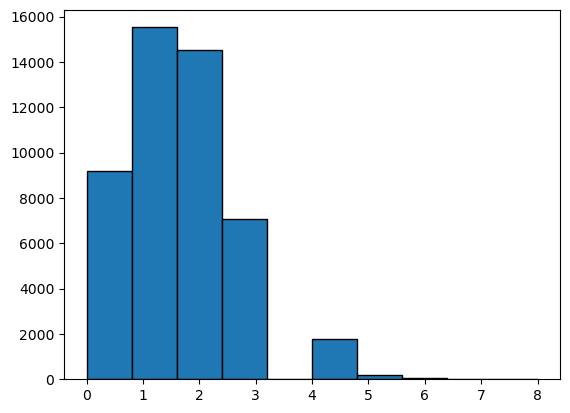

In [717]:
plt.hist(df['bedrooms'], edgecolor='black')
plt.show()

There are not outliers

### Complex analysis

> Plot a correlation matrix to understand the correlation between features and target. Plot a heat map for the correlation matrix. Is there a correlation?

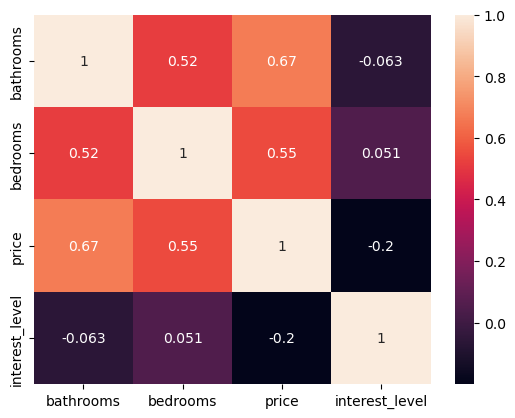

In [718]:
sns.heatmap(df.corr(), annot=True)
plt.show()

There are correlations which is a good sign meaning that there is probably a relationship to be explored

> Plot a scatterplot to visualize the correlation between the features and the target. You should return 3 plots where the X-axis is the target and the Y-axis is a feature.

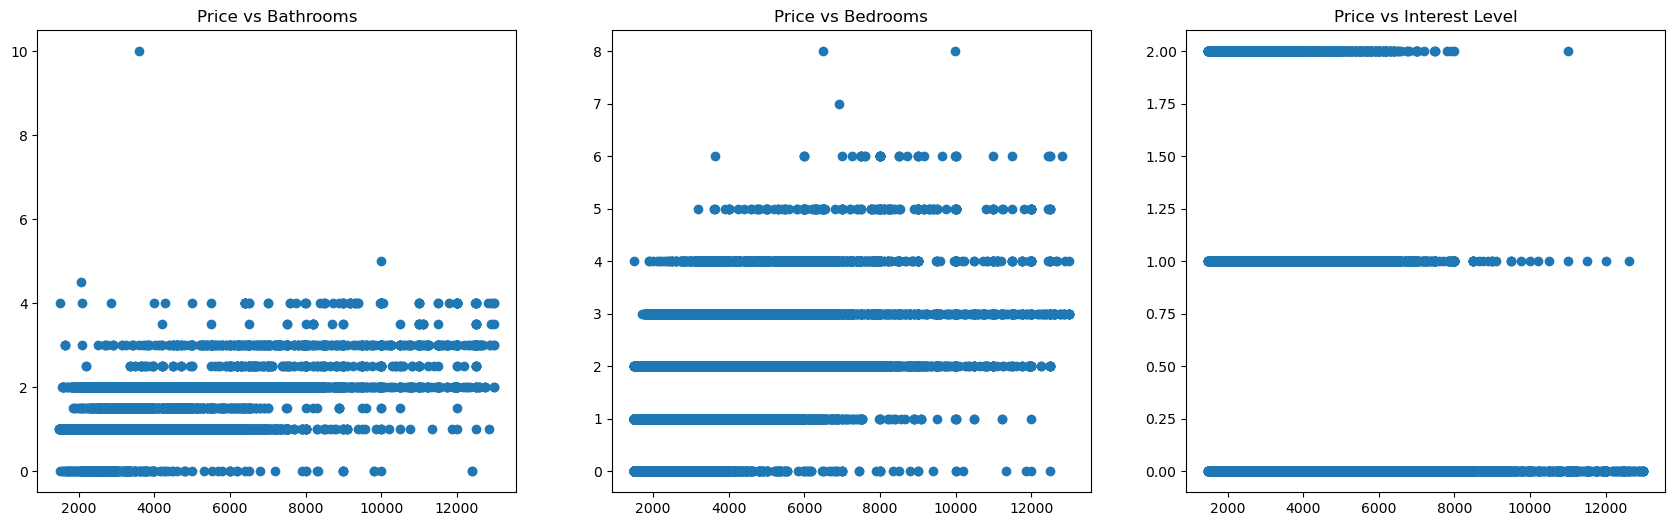

In [719]:
fg, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 6))
fg1, fg2, fg3 = axes

fg1.scatter(df['price'], df['bathrooms'])
fg1.set_title('Price vs Bathrooms')
fg2.scatter(df['price'], df['bedrooms'])
fg2.set_title('Price vs Bedrooms')
fg3.scatter(df['price'], df['interest_level'])
fg3.set_title('Price vs Interest Level')
plt.show()

## Creating Features

> creating new variebles to assess correlations

In [720]:
df['norm_bathroom'] = StandardScaler().fit_transform(df['bathrooms'].values.reshape(-1, 1))
df['norm_bedrooms'] = StandardScaler().fit_transform(df['bedrooms'].values.reshape(-1, 1))

In [721]:
df['log_bathrooms'] = np.log(df['bathrooms'] + 1)
df['log_bedrooms'] = np.log(df['bedrooms'] + 1)
df['log_interest_level'] = np.log(df['interest_level'] + 1)

In [722]:
df['bathrooms^2'] = df['bathrooms']**2
df['bedrooms^2'] = df['bedrooms']**2  
df['interest_level^2'] = df['interest_level']**2

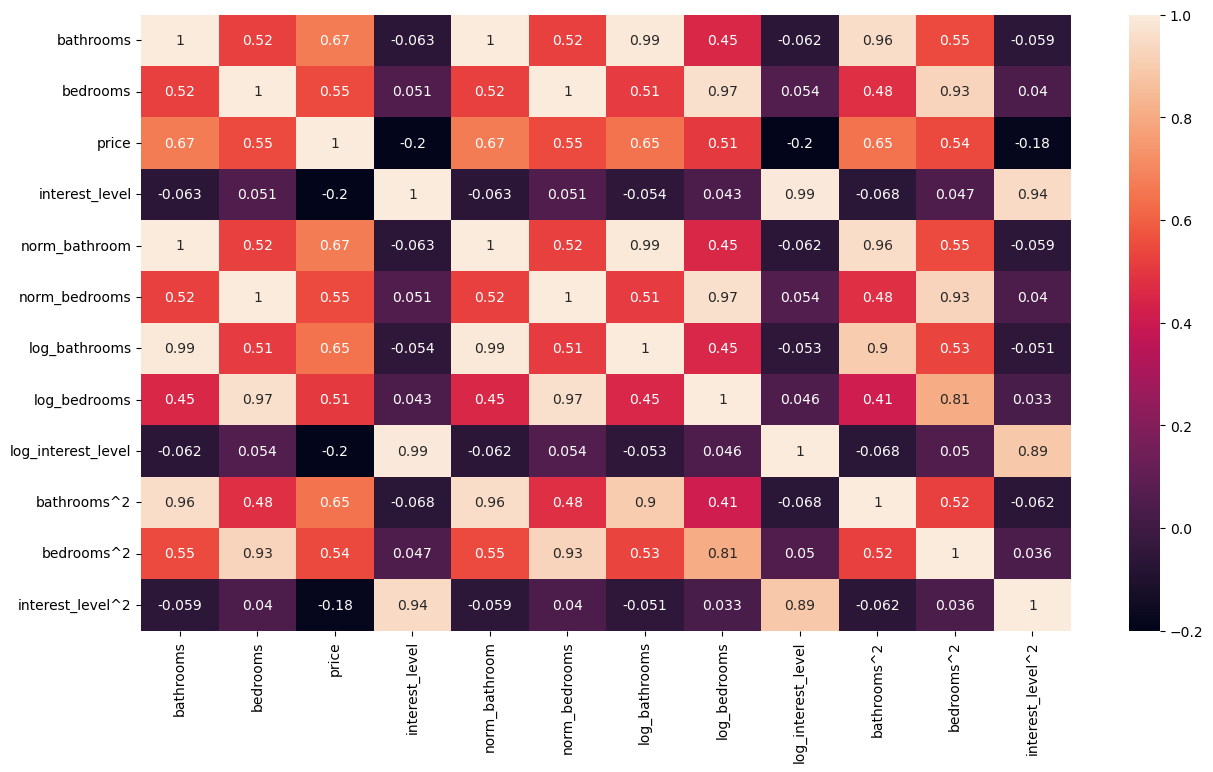

In [723]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

> To train the model here, we will not use new features. To train the model, we will only consider the features 'bathrooms' and 'bedrooms'.

In [724]:
X = df[['bathrooms', 'bedrooms']]
y = df['price']

> To use PolynomialFeatures, we first need to split the data into training and test samples. We have already done this for you, please read the training and test data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

> Initialize PolynomialFeatures() with a degree of 10.

In [727]:
poly = PolynomialFeatures(degree=10)

> Apply PolynomialFeatures() to fit and transform your training and test data.

In [728]:
X_train=poly.fit_transform(X_train)
X_test=poly.fit_transform(X_test)

## Train 3 models: linear regression, decision tree and native model

### Results table

> Create two empty Pandas DataFrames with columns 'model', 'train', 'test'. Let's call the first one result_MAE and the second one result_RMSE. We will fill these tables with the results of the models.

In [729]:
result_MAE = pd.DataFrame(columns=['model', 'train', 'test'])
result_RMSE = pd.DataFrame(columns=['model', 'train', 'test'])

### Linear Regression

> Initialize linear regression from sklearn with no parameters.

In [730]:
linreg = LinearRegression()

> Fit model and make predictions on training and test features. Save it as new columns in data.

In [731]:
linreg.fit(X_train, y_train)
y_pred_train = linreg.predict(X_train)
linreg.fit(X_test, y_test)
y_pred_test = linreg.predict(X_test)

> Compute MAE (Mean Absolute Error) on training and test targets.

In [732]:
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

> Calculate RMSE (Root Mean Square Error) on training and test objectives.

In [733]:
rmse_train = root_mean_squared_error(y_train, y_pred_train)
rmse_test = root_mean_squared_error(y_test, y_pred_test)

> Insert  metrics into tables result_MAE and result_RMSE with model name 'linear_regression'.

In [734]:
result_MAE.loc[len(result_MAE)] = ['linear_regression', mae_train, mae_test]
result_RMSE.loc[len(result_RMSE)] = ['linear_regression', rmse_train, rmse_test]

### Decision Tree

> Initialize decision tree regressor from sklearn with fixed random_state=42.

In [735]:
tree = DecisionTreeClassifier(random_state=42)

> Fit it to train features and train target and make prediction on train and test features. Save it as a new column in data.

In [736]:
tree.fit(X_train, y_train)
y_pred_train = tree.predict(X_train)
tree.fit(X_test, y_test)
y_pred_test = tree.predict(X_test)

> Compute MAE (Mean Absolute Error) on train and test targets.

In [737]:
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

> Compute RMSE (Root Mean Square Error) on train and test targets.

In [738]:
rmse_train = root_mean_squared_error(y_train, y_pred_train)
rmse_test = root_mean_squared_error(y_test, y_pred_test)

> Insert metrics into tables result_MAE and result_RMSE with model name 'decision_tree'.

In [739]:
result_MAE.loc[len(result_MAE)] = ['decision_tree', mae_train, mae_test]
result_RMSE.loc[len(result_RMSE)] = ['decision_tree', rmse_train, rmse_test]

### Native Models

> Calculate the mean and median of 'price' on the training and test data and create a column with these values.

In [740]:
mean_train = [y_train.mean()]*len(y_train)
mean_test =[y_test.mean()]*len(y_test)
median_train = [y_train.median()]*len(y_train)
median_test = [y_test.median()]*len(y_test)


> Calculate the MAE on the training and test targets between your target and the calculated mean and median.

In [741]:
mae_train_mean = mean_absolute_error(y_train, mean_train)
mae_test_mean = mean_absolute_error(y_test, mean_test)
mae_train_median = mean_absolute_error(y_train, median_train)
mae_test_median = mean_absolute_error(y_test, median_test)

> Calculate the RMSE on the training and test targets between your target and the calculated mean and median.

In [742]:
rmse_train_median = root_mean_squared_error(y_train, median_train)
rmse_train_mean = root_mean_squared_error(y_train, mean_train)
rmse_test_median = root_mean_squared_error(y_test, median_test)
rmse_test_mean = root_mean_squared_error(y_test, mean_test)

> Inserting metrics into tables result_MAE and result_RMSE with model names 'native_mean' and 'native_median'.

In [743]:
result_MAE.loc[len(result_MAE)] = ['native_mean', mae_train_mean, mae_test_mean]
result_RMSE.loc[len(result_RMSE)] = ['native_mean', rmse_train_mean, rmse_test_mean]
result_MAE.loc[len(result_MAE)] = ['native_median', mae_train_median, mae_test_median]
result_RMSE.loc[len(result_RMSE)] = ['native_median', rmse_train_median, rmse_test_median]

### Compare the results

> Print your final result_MAE and result_RMSE tables.

In [744]:
print(result_MAE)

               model        train         test
0  linear_regression   753.675999  1132.198926
1      decision_tree   788.088182   968.908183
2        native_mean  1134.361473  1440.961299
3      native_median  1082.220859  1322.640673


In [745]:
print(result_RMSE)

               model        train         test
0  linear_regression  1070.598967  9593.319195
1      decision_tree  1156.447476  9573.510124
2        native_mean  1585.609099  9713.026562
3      native_median  1631.719953  9731.481148


> Which is the best model?

Best Model is decision tree as it has the lowest values on the test data set